# Assignment 1: Inspecting the PubMed Dataset

In this code for the first assignment, we will get to know the dataset that we will be using throughout. You can find the assignment tasks at the very bottom of this document.

Our dataset consists of short texts (article abstracts) from the [PubMed](https://www.ncbi.nlm.nih.gov/pubmed/) database of scientific publications in the Life Science domain. As the full dataset consists of millions of documents, we are using just a small subset, namely all publications that contain the word "aspirin" in their title or abstract. You can download that dataset in the form of four files (`aspirin_Summaries.pkl.bz2`, etc.) from Canvas. Save these four files in a directory called `data`, which should be a sub-directory of the one that contains this notebook file (or adjust the file path in the code)

## Importing some Libraries

In [1]:
from collections import namedtuple, defaultdict, Counter
import pickle, bz2

## Loading the Dataset

In [2]:
Summaries_file = 'data/aspirin__Summaries.pkl.bz2'
Summaries = pickle.load( bz2.BZ2File( Summaries_file, 'rb' ) )

To make it easier to access the data, we convert here paper entries into [named tuples](http://docs.python.org/3/library/collections.html#collections.namedtuple). This will allow us to refer to fields by keyword (like `var.year`), rather than index (like `var[2]`).

In [3]:
paper = namedtuple( 'paper', ['title', 'authors', 'year', 'doi'] )

for (id, paper_info) in Summaries.items():
    Summaries[id] = paper( *paper_info )

In [4]:
Summaries[28792522]

paper(title='Biochemical characterization and anti-inflammatory properties of an isothiocyanate-enriched moringa (Moringa oleifera) seed extract.', authors=['Jaja-Chimedza A', 'Graf BL', 'Simmler C', 'Kim Y', 'Kuhn P', 'Pauli GF', 'Raskin I'], year=2017, doi='10.1371/journal.pone.0182658')

In [5]:
Summaries[28792522].title

'Biochemical characterization and anti-inflammatory properties of an isothiocyanate-enriched moringa (Moringa oleifera) seed extract.'

## Dataset Statistics

Plotting relies on [matplotlib](http://matplotlib.org/) and [NumPy](http://www.numpy.org/). If your installation doesn't have them included already, you can download them [here](http://matplotlib.org/downloads.html) and [here](http://sourceforge.net/projects/numpy/files/NumPy/1.10.1/), respectively.

In [6]:
import matplotlib.pyplot as plt

# show plots inline within the notebook
%matplotlib inline
# set plots' resolution
plt.rcParams['savefig.dpi'] = 100

### Papers per Year

Here, we will get information on how many papers in the dataset were published per year.

We'll be using the [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) class to determine the number of papers per year.

In [7]:
paper_years = [ p.year for p in Summaries.values() ]
papers_per_year = sorted( Counter(paper_years).items() )

print('Number of papers in the dataset per year for the past decade:')
print(papers_per_year[-10:])

Number of papers in the dataset per year for the past decade:
[(2009, 1487), (2010, 1593), (2011, 1590), (2012, 1690), (2013, 1756), (2014, 1818), (2015, 1790), (2016, 1806), (2017, 1525), (2018, 1)]


Filtering results, to obain only papers since 1940:

In [8]:
papers_per_year_since_1940 = [ (y,count) for (y,count) in papers_per_year if y >= 1940 ]
years_since_1940 = [ y for (y,count) in papers_per_year_since_1940 ]
nr_papers_since_1940 = [ count for (y,count) in papers_per_year_since_1940 ]

print('Number of papers in the dataset published since 1940:')
print(sum(nr_papers_since_1940))

Number of papers in the dataset published since 1940:
43586


Creating a bar plot to visualize the results (using [matplotlib.pyplot.bar](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar)):

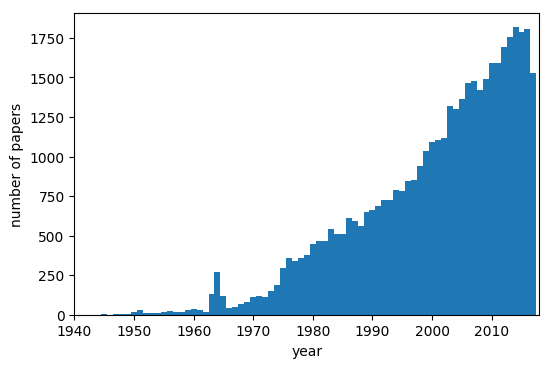

In [9]:
plt.bar(left=years_since_1940, height=nr_papers_since_1940, width=1.0)
plt.xlim(1940, 2018)
plt.xlabel('year')
plt.ylabel('number of papers');

Alternatively, you can get the same result in a more direct manner by plotting it as a histogram with [matplotlib.pyplot.hist](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist):

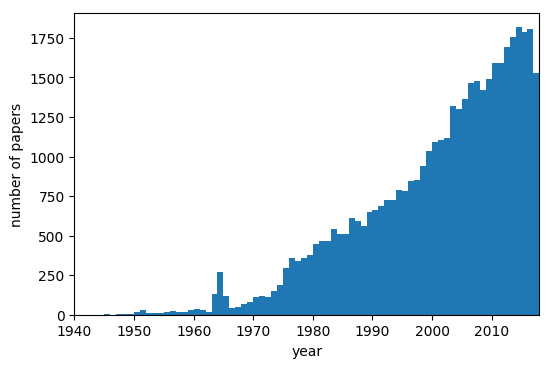

In [10]:
plt.hist( x=[p.year for p in Summaries.values()], bins=range(1940,2019) );
plt.xlim(1940, 2018)
plt.xlabel('year')
plt.ylabel('number of papers');

### Papers per Author

Here, we will obtain the distribution characterizing the number of papers published by an author.

In [11]:
# flattening the list of lists of authors:
authors_expanded = [ auth for paper in Summaries.values() for auth in paper.authors ]

nr_papers_by_author = Counter( authors_expanded )

In [12]:
print('Number of authors in the dataset with distinct names:')
print(len(nr_papers_by_author))

Number of authors in the dataset with distinct names:
107319


In [13]:
print('Top 50 authors with greatest number of papers:')
print(sorted(nr_papers_by_author.items(), key=lambda i:i[1], reverse=True)[:50])

Top 50 authors with greatest number of papers:
[('Lip GY', 176), ('Wang Y', 162), ('Szczeklik A', 161), ('Bhatt DL', 154), ('Hennekens CH', 142), ('Angiolillo DJ', 130), ('Serhan CN', 125), ('Gurbel PA', 120), ('Patrono C', 119), ('Zhang Y', 109), ('Topol EJ', 109), ('Park HS', 107), ('Lanas A', 106), ('Kim JH', 106), ('Kim SH', 105), ('Buring JE', 103), ('Cannon CP', 102), ('Steg PG', 98), ('Fuster V', 94), ('Serebruany VL', 93), ('Yusuf S', 91), ('Konturek SJ', 90), ('Fox KA', 89), ('Tantry US', 88), ('Verheugt FW', 88), ('Stevenson DD', 87), ('Hart RG', 87), ('de Gaetano G', 86), ('Liu Y', 83), ('Li Y', 82), ('Eikelboom JW', 82), ('Montalescot G', 81), ('Braunwald E', 80), ('Park CS', 80), ('Diener HC', 75), ('Peterson ED', 74), ('Califf RM', 74), ('White HD', 73), ('Wang X', 72), ('Brzozowski T', 70), ('Aronow WS', 69), ('Manson JE', 68), ('FitzGerald GA', 67), ('Park JS', 67), ('Wang J', 67), ('Li J', 66), ('Cohen M', 66), ('Hawkey CJ', 65), ('Algra A', 65), ('Li X', 64)]


Then we can create a histogram to visualize the results:

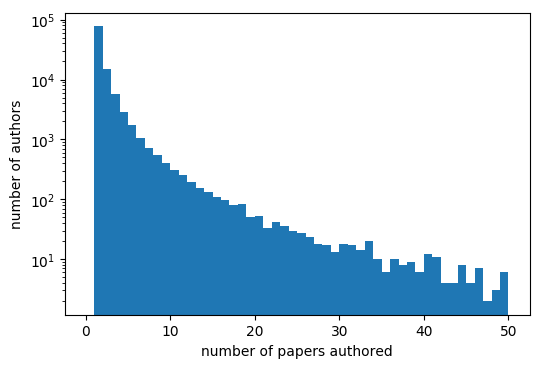

In [14]:
plt.hist( x=list(nr_papers_by_author.values()), bins=range(51), log=True )
plt.xlabel('number of papers authored')
plt.ylabel('number of authors');

### Authors per Paper

Then we can make a similar analysis for the number of authors per paper:

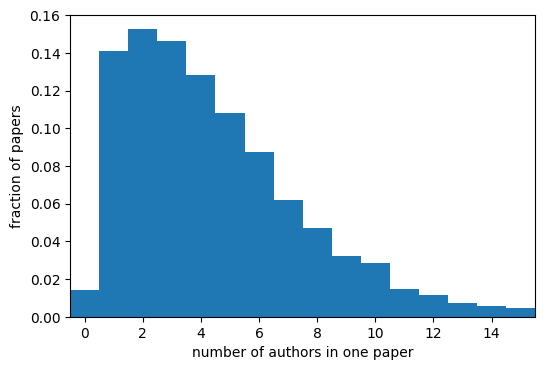

In [15]:
plt.hist( x=[ len(p.authors) for p in Summaries.values() ], bins=range(20), align='left', normed=True )
plt.xlabel('number of authors in one paper')
plt.ylabel('fraction of papers')
plt.xlim(-0.5, 15.5);

### Words in Titles

And then we can have a first look into the words we find in titles (applying a very naive word splitting method for now):

In [16]:
words = [ word.lower() for paper in Summaries.values() for word in paper.title.split(' ') ]
word_counts = Counter(words)

print('Number of distinct words in the paper titles:')
print(len(word_counts))

Number of distinct words in the paper titles:
42410


----------

# Tasks

**Your name:** ...

### Task 1

Create a Python dictionary object that returns sets of author names for a given year. Name this dictionary `authors_at_year`. (You can use a [*defaultdict*](https://docs.python.org/3/library/collections.html#collections.defaultdict) with a default value of [*set*](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset).) Demonstrate the working of this dictionary by showing the author set for the year 1948.

In [ ]:
# Add your code here

### Task 2

Based on the dictionary `authors_at_year` from exercise 1 above, create a plot for the years from 1960 until now that shows how many authors published at least one paper. (You can retrieve the number of unique items in a set `s` with `len(s)`.)

In [ ]:
# Add your code here

### Task 3

Print out the top 10 most often occurring words in the papers' titles together with their frequency (in descending order with respect to the frequency). You can make use of the data structures created above.

In [ ]:
# Add your code here

### Task 4

Calculate and plot (e.g. using [plt.plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)) a graph of the frequency of the 50 most frequent words in titles of papers, from most frequent to least frequent. (For readability, don't show the actual words.) You can make use of the data structures created above.

In [ ]:
# Add your code here

### Task 5

What do you notice when looking at the top 10 most frequent words? Explain what types of words we find in this top-10 and why.

**Answer:** [_Write your answer text here_]

# Submission

Submit the answers to the assignment as a modified version of this Notebook file (file with `.ipynb` extension) that includes your code and your answers via Canvas. Don't forget to add your name, and remember that the assignments have to be done individually and group submissions are **not allowed**.